<a href="https://colab.research.google.com/github/rosacarla/Previsoes-de-series-temporais-de-acoes/blob/main/Imersao_Python_Aula05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 5 da Imersão Python: Do Excel à Análise de Dados
> #### Instituição: Alura  
> #### Objetivo: fazer previsões de séries temporais de ações com Prophet.
> #### Autora: Carla Edila Silveira
> #### Data: 29/03/2024

><img src='https://i.postimg.cc/fTNpP24y/aula05-cabecalho.png'>

In [ ]:
# Importa bibliotecas do projeto
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet

O Prophet é uma ferramenta desenvolvida pelo Facebook para fazer previsões em séries temporais, que são basicamente dados coletados ao longo do tempo, como os preços das ações. É famoso por ser fácil de usar e por funcionar bem mesmo com poucos dados ou com dados que possuem padrões irregulares, o que é comum no mercado de ações.

Vamos usar dados de ações da empresa Johnson & Johnson como exemplo.

Aqui, usamos um comando para baixar os dados. É como se estivéssemos pedindo à internet para nos dar os preços das ações da Johnson & Johnson desde 2020 até o final de 2023. Fácil, né?

In [ ]:
# Baixa dados dos últimos quatro anos para uma ação específica (Jonnson & Johnson)
# dados = yf.download("JNJ", start="2020-01-01", end="2023-12-31", progress=False)
# dados = dados.reset_index()
# dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,145.869995,146.020004,145.080002,145.970001,130.099106,5777000
1,2020-01-03,143.500000,145.369995,143.000000,144.279999,128.592834,5752400
2,2020-01-06,144.000000,144.199997,142.850006,144.100006,128.432434,7731300
3,2020-01-07,144.009995,145.449997,141.380005,144.979996,129.216766,7382900
4,2020-01-08,144.869995,145.979996,143.699997,144.960007,129.198944,6605800
...,...,...,...,...,...,...,...
1001,2023-12-22,155.250000,156.529999,155.020004,155.460007,154.288544,3798500
1002,2023-12-26,155.000000,156.350006,154.850006,156.139999,154.963409,4170000
1003,2023-12-27,155.500000,156.520004,155.419998,156.350006,155.171844,5288100
1004,2023-12-28,156.000000,157.240005,155.990005,156.580002,155.400101,4377500


In [ ]:
# Baixa dados dos últimos 4 anos da ação BBAS3 (Banco do Brasil)
dados = yf.download("BBAS3.SA", start="2020-01-01", end="2023-12-31", progress=False)
dados = dados.reset_index()
dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,53.349998,53.970001,53.169998,53.799999,40.929504,13159900
1,2020-01-03,53.099998,53.910000,52.849998,53.709999,40.861027,9465400
2,2020-01-06,53.400002,53.400002,52.450001,53.000000,40.320892,9999900
3,2020-01-07,53.000000,53.029999,52.290001,52.599998,40.016575,10638500
4,2020-01-08,52.759998,52.990002,52.040001,52.119999,39.651409,21468600
...,...,...,...,...,...,...,...
988,2023-12-21,54.799999,54.799999,53.889999,54.290001,53.697742,10004000
989,2023-12-22,54.500000,54.619999,54.070000,54.439999,53.846104,7303200
990,2023-12-26,54.439999,54.959999,54.299999,54.939999,54.340649,3983200
991,2023-12-27,54.799999,54.970001,54.580002,54.860001,54.261520,3372500


Agora, dividimos nossos dados em duas partes: uma para treinar nosso 'adivinho' digital, que é até julho de 2023, e outra para testar nossas previsões, que é o restante do ano.

In [ ]:
# Divide os dados em treino (até o final do 1o. semestre de 2023) e teste (2o. semestre de 2023)
dados_treino = dados[dados['Date'] < '2023-07-31']
dados_teste = dados[dados['Date'] >= '2023-07-31']

In [ ]:
# Mostra dataframe dos dados de treino
dados_treino

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,53.349998,53.970001,53.169998,53.799999,40.929504,13159900
1,2020-01-03,53.099998,53.910000,52.849998,53.709999,40.861027,9465400
2,2020-01-06,53.400002,53.400002,52.450001,53.000000,40.320892,9999900
3,2020-01-07,53.000000,53.029999,52.290001,52.599998,40.016575,10638500
4,2020-01-08,52.759998,52.990002,52.040001,52.119999,39.651409,21468600
...,...,...,...,...,...,...,...
884,2023-07-24,48.240002,48.849998,47.180000,47.570000,45.682293,17870500
885,2023-07-25,48.259998,48.259998,47.299999,47.320000,45.442215,10766700
886,2023-07-26,47.410000,47.799999,47.070000,47.720001,45.826340,12383500
887,2023-07-27,47.720001,47.759998,46.650002,46.740002,44.885235,11750700


In [ ]:
# Mostra dataframe dos dados de teste
dados_teste

,Date,Open,High,Low,Close,Adj Close,Volume
889,2023-07-31,47.599998,48.320000,47.480000,48.189999,46.277687,10389900
890,2023-08-01,47.919998,48.029999,46.939999,47.360001,45.480633,12680100
891,2023-08-02,47.259998,47.759998,47.099998,47.570000,45.682293,5602000
892,2023-08-03,47.900002,47.980000,47.340000,47.650002,45.759117,8376300
893,2023-08-04,47.500000,47.959999,47.049999,47.400002,45.519039,11489500
...,...,...,...,...,...,...,...
988,2023-12-21,54.799999,54.799999,53.889999,54.290001,53.697742,10004000
989,2023-12-22,54.500000,54.619999,54.070000,54.439999,53.846104,7303200
990,2023-12-26,54.439999,54.959999,54.299999,54.939999,54.340649,3983200
991,2023-12-27,54.799999,54.970001,54.580002,54.860001,54.261520,3372500


In [ ]:
# Prepara os dados para o FBProphet trabalhar com 2 colunas (Data e Close) renomeadas como 'ds' e 'y'
# Close é a coluna da previsão
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

In [ ]:
# Mostra dataframe selecionado para treino com Prophet
dados_prophet_treino

,ds,y
0,2020-01-02,53.799999
1,2020-01-03,53.709999
2,2020-01-06,53.000000
3,2020-01-07,52.599998
4,2020-01-08,52.119999
...,...,...
884,2023-07-24,47.570000
885,2023-07-25,47.320000
886,2023-07-26,47.720001
887,2023-07-27,46.740002


O próximo passo é preparar os dados para o nosso adivinho, o Prophet. É como se estivéssemos arrumando os dados para que ele entenda o que estamos perguntando.

Depois, criamos o modelo do Prophet. Aqui, estamos dizendo ao Prophet para considerar padrões semanais e anuais nos dados, mas não diários. E também adicionamos feriados dos EUA, já que eles podem influenciar o preço das ações.

In [ ]:
# Cria e treina o modelo
# A sazonalidade é importante por considerar mudanças que ocorrem em certos períodos
modelo = Prophet(weekly_seasonality=True,  # sazonalidade semanal
        yearly_seasonality=True,  # sazonalidade anual
        daily_seasonality=False)  # sazonalidade diária

modelo.add_country_holidays(country_name='US')

modelo.fit(dados_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmplso62_ih/n8l_o5ds.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplso62_ih/b0qx3cap.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53580', 'data', 'file=/tmp/tmplso62_ih/n8l_o5ds.json', 'init=/tmp/tmplso62_ih/b0qx3cap.json', 'output', 'file=/tmp/tmplso62_ih/prophet_modelfowezeif/prophet_model-20240330051026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:10:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:10:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Agora, a parte mágica! Pedimos ao Prophet para prever o futuro, até o final de 2023. E então, plotamos um gráfico para ver como nossa previsão se compara com os dados reais.

In [ ]:
# Cria datas futuras para previsão até o final de 2023
futuro = modelo.make_future_dataframe(periods=150)
previsao = modelo.predict(futuro)

# Mostra todos os dados calculados pelo modelo
previsao

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,53.815063,49.435693,55.540736,53.815063,53.815063,0.0,0.0,0.0,0.0,...,0.114194,0.114194,0.114194,-1.374326,-1.374326,-1.374326,0.0,0.0,0.0,52.554931
1,2020-01-03,53.600772,49.178975,55.472155,53.600772,53.600772,0.0,0.0,0.0,0.0,...,0.115551,0.115551,0.115551,-1.366320,-1.366320,-1.366320,0.0,0.0,0.0,52.350003
2,2020-01-06,52.957898,48.881747,54.844830,52.957898,52.957898,0.0,0.0,0.0,0.0,...,0.145906,0.145906,0.145906,-1.298710,-1.298710,-1.298710,0.0,0.0,0.0,51.805095
3,2020-01-07,52.743607,48.691783,54.758344,52.743607,52.743607,0.0,0.0,0.0,0.0,...,0.169547,0.169547,0.169547,-1.263513,-1.263513,-1.263513,0.0,0.0,0.0,51.649641
4,2020-01-08,52.529316,48.243380,54.369416,52.529316,52.529316,0.0,0.0,0.0,0.0,...,0.139488,0.139488,0.139488,-1.223036,-1.223036,-1.223036,0.0,0.0,0.0,51.445767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,2023-12-21,52.229718,47.257839,56.148845,48.892533,55.279789,0.0,0.0,0.0,0.0,...,0.114194,0.114194,0.114194,-0.851486,-0.851486,-0.851486,0.0,0.0,0.0,51.492426
1035,2023-12-22,52.267149,46.956832,55.674194,48.902841,55.335245,0.0,0.0,0.0,0.0,...,0.115551,0.115551,0.115551,-0.930434,-0.930434,-0.930434,0.0,0.0,0.0,51.452267
1036,2023-12-23,52.304581,46.555630,55.611821,48.913149,55.411347,0.0,0.0,0.0,0.0,...,-0.342343,-0.342343,-0.342343,-1.005496,-1.005496,-1.005496,0.0,0.0,0.0,50.956742
1037,2023-12-24,52.342012,46.722068,55.762220,48.923457,55.489107,0.0,0.0,0.0,0.0,...,-0.342343,-0.342343,-0.342343,-1.075609,-1.075609,-1.075609,0.0,0.0,0.0,50.924061


Neste gráfico, vocês verão três linhas. A azul mostra o preço real das ações até julho de 2023, a verde mostra os preços reais após essa data, e a laranja mostra o que o Prophet previu. A linha vermelha pontilhada marca onde começam as previsões.

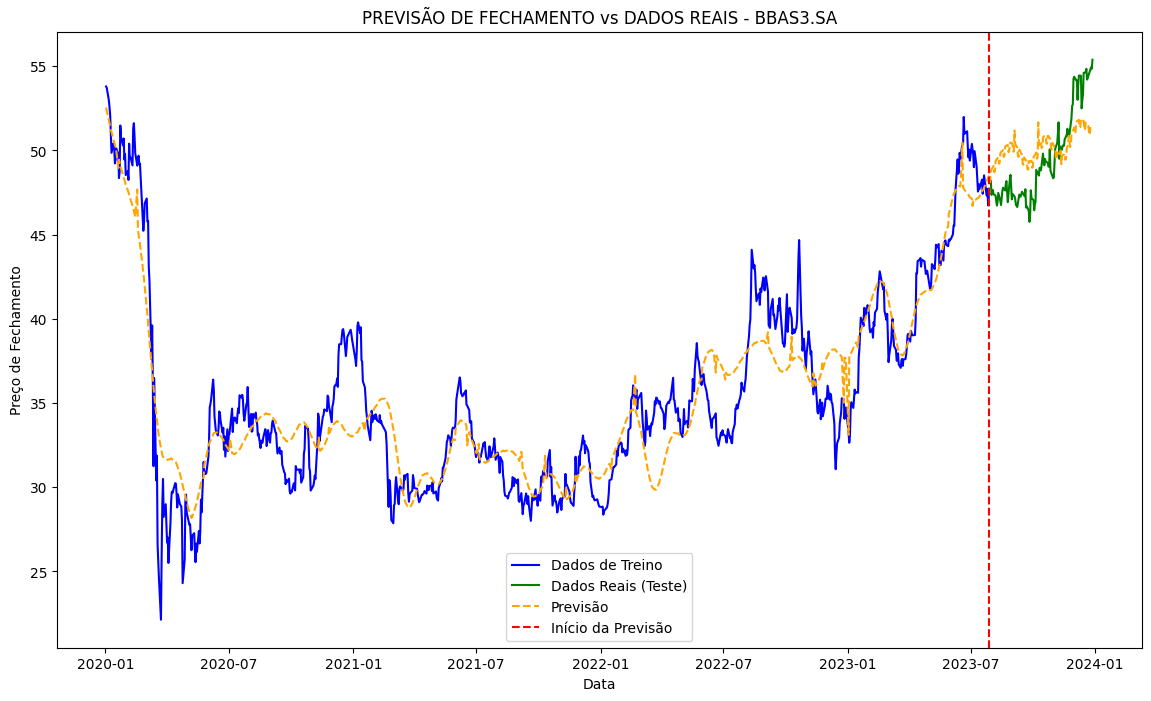

In [ ]:
# Plota os dados de treino, teste e previsões
plt.figure(figsize=(14, 8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino', color='blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
# plt.title('PREVISÃO DE FECHAMENTO vs DADOS REAIS - JNJ')
plt.title('PREVISÃO DE FECHAMENTO vs DADOS REAIS - BBAS3.SA')
plt.legend()
plt.show()

> Na 1a. execução com a ação JNJ, obteve-se o seguinte gráfico de previsões:
>
> <img src='https://i.postimg.cc/MZ1kVT08/aula05-grafico-jnj.png'>

>OBSERVAÇÕES: Esse modelo é utilizado para tarefas de previsão de demanda de estoques e vendas. Quanto à sazonalidade, por exemplo, uma empresa produtora de panetone tem sazonalidade anual e é diferente do caso de ações da bolsa de valores.  